In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [93]:
import pandas as pd

file_path = r"D:\Capston\synthetic_heart_attack_data.xlsx"  # Use raw string to avoid escape sequence issues
data = pd.read_excel(file_path)  # Use read_excel for .xlsx files

print(data.head())  # Check the first few rows


   Age  Gender  Cholesterol Blood Pressure Smoking Diabetes Physical Activity  \
0   58  Female          257         110/73      No       No          Moderate   
1   71  Female          275         128/86     Yes       No               Low   
2   48    Male          204         116/61      No      Yes               Low   
3   34  Female          183         130/75     Yes       No               Low   
4   62    Male          162         102/68     Yes      Yes          Moderate   

         BMI Family History Alcohol Consumption  ... Income Level  \
0  33.952439             No                 NaN  ...       Medium   
1  20.877977             No                High  ...       Medium   
2  19.265190            Yes            Moderate  ...         High   
3  39.878102            Yes            Moderate  ...       Medium   
4  23.503660            Yes            Moderate  ...          Low   

  Marital Status  Number of Children Pet Ownership Daily Screen Time  \
0         Single          

In [94]:
# Dataset Outlook
print("Dataset Overview:")
print(data.head())
print(data.info())
print(data.describe())

Dataset Overview:
   Age  Gender  Cholesterol Blood Pressure Smoking Diabetes Physical Activity  \
0   58  Female          257         110/73      No       No          Moderate   
1   71  Female          275         128/86     Yes       No               Low   
2   48    Male          204         116/61      No      Yes               Low   
3   34  Female          183         130/75     Yes       No               Low   
4   62    Male          162         102/68     Yes      Yes          Moderate   

         BMI Family History Alcohol Consumption  ... Income Level  \
0  33.952439             No                 NaN  ...       Medium   
1  20.877977             No                High  ...       Medium   
2  19.265190            Yes            Moderate  ...         High   
3  39.878102            Yes            Moderate  ...       Medium   
4  23.503660            Yes            Moderate  ...          Low   

  Marital Status  Number of Children Pet Ownership Daily Screen Time  \
0       

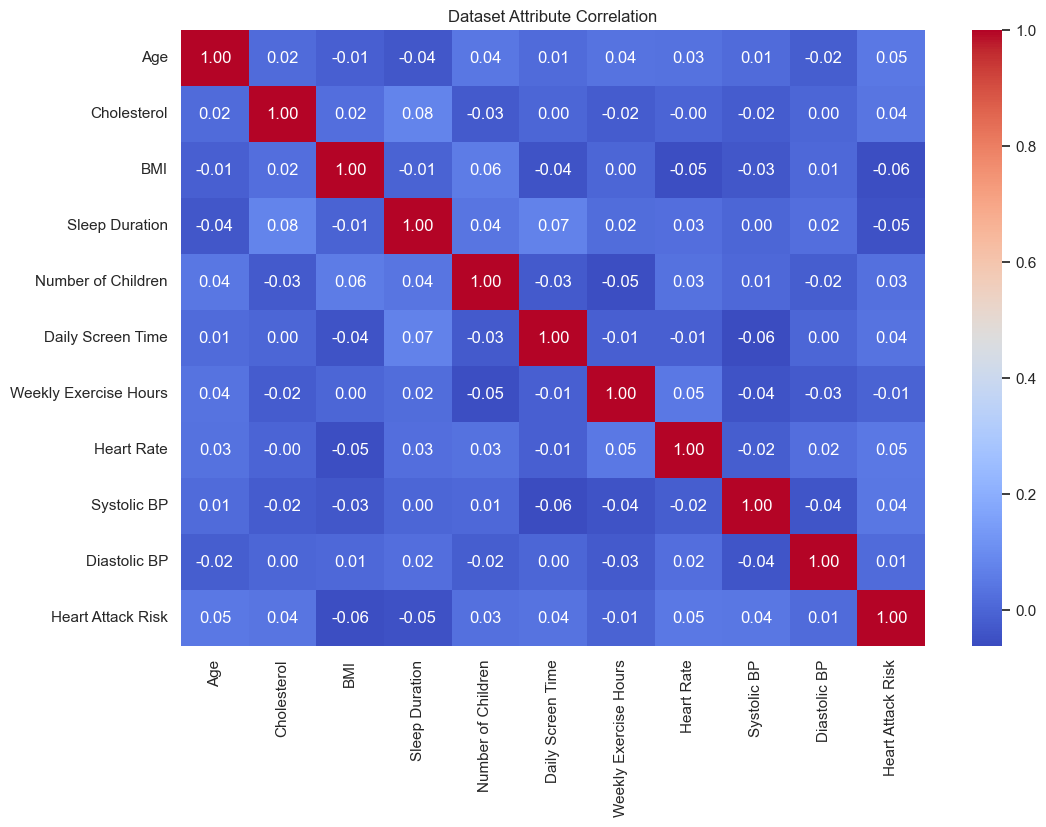

In [95]:
# Dataset Attribute Correlation
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Dataset Attribute Correlation')
plt.show()

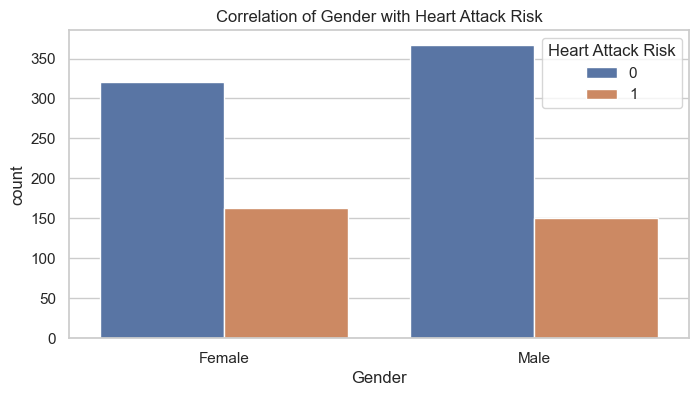

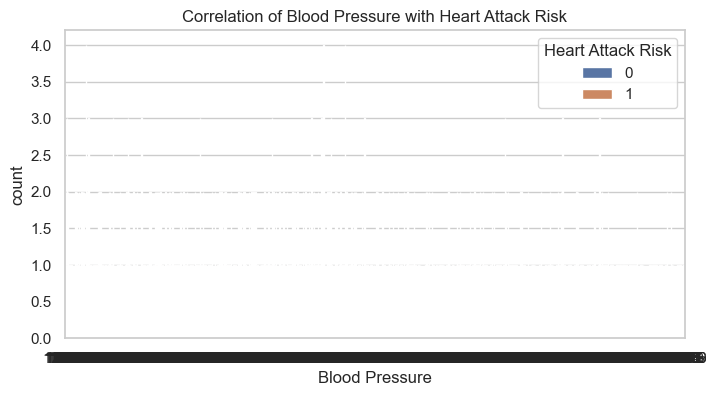

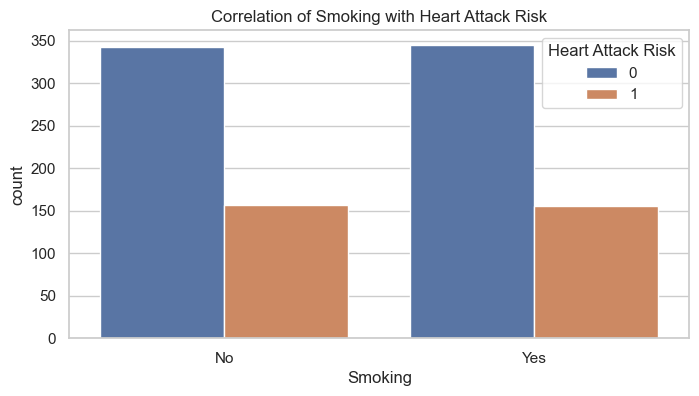

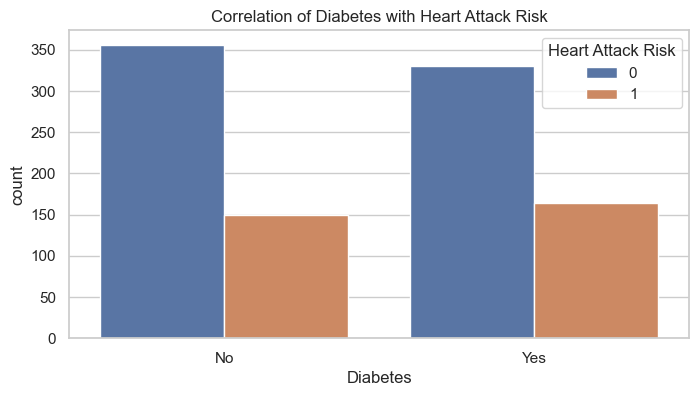

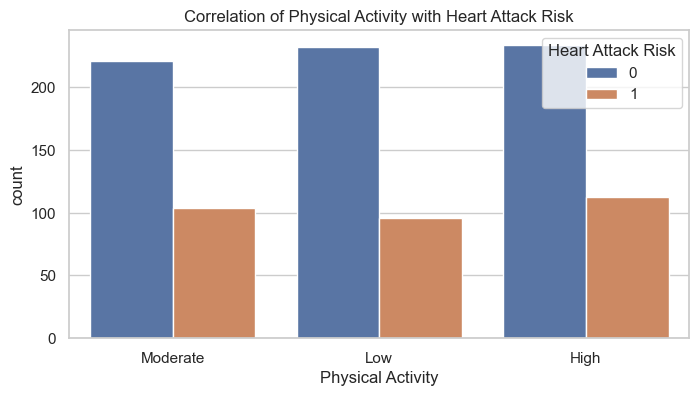

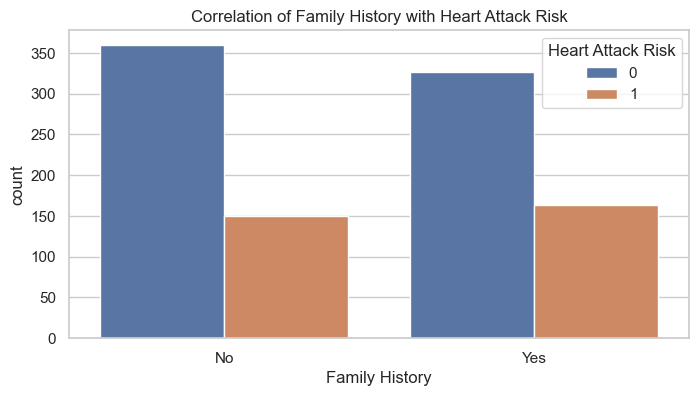

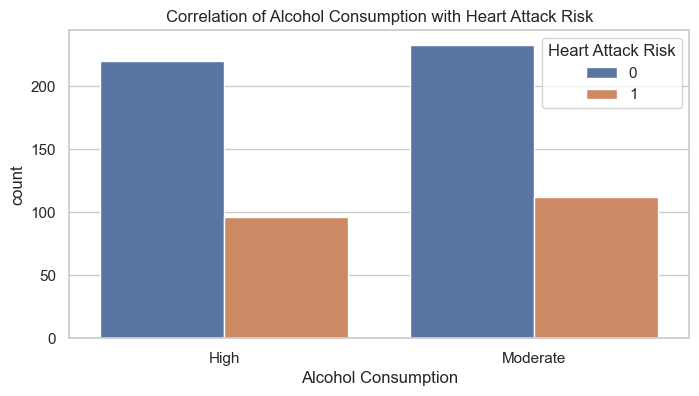

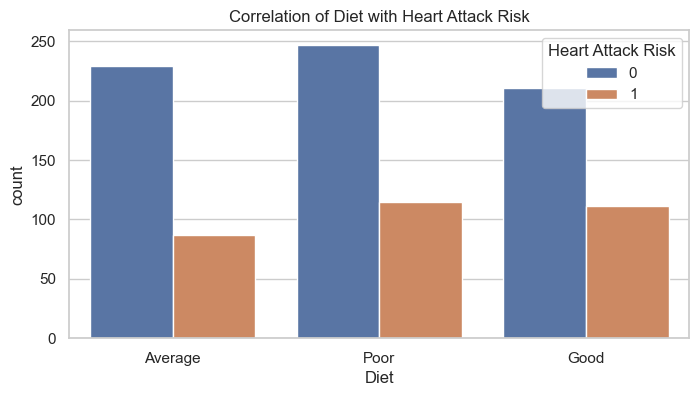

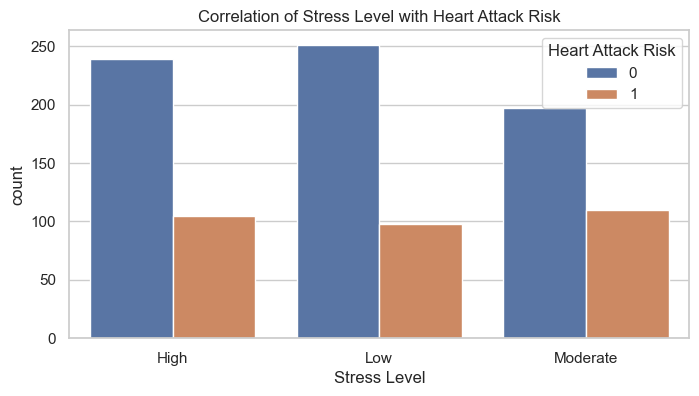

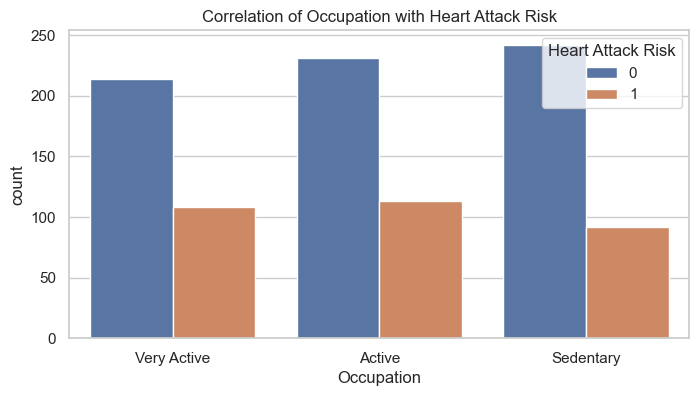

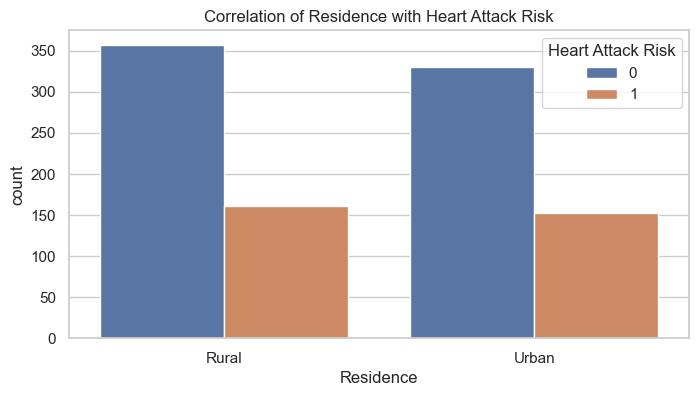

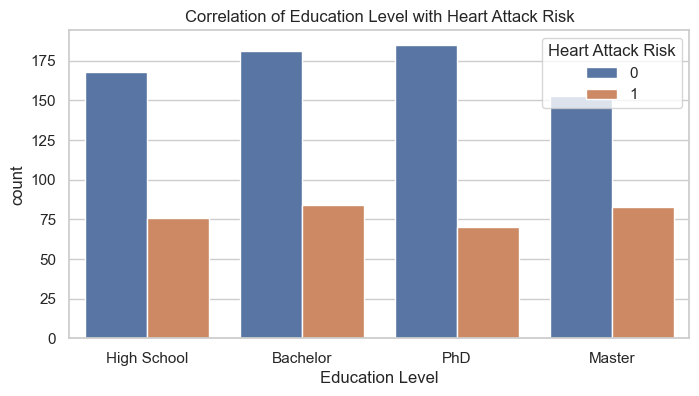

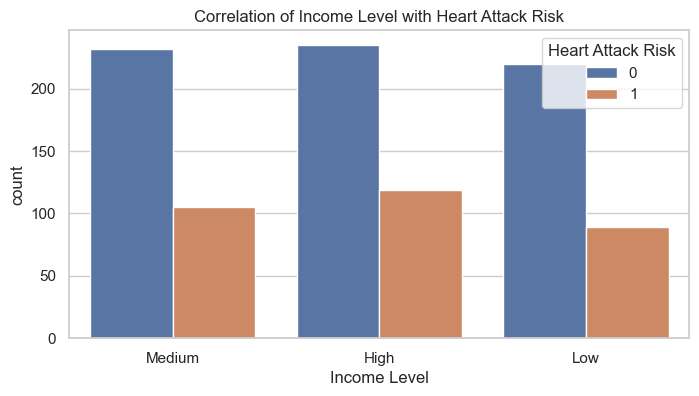

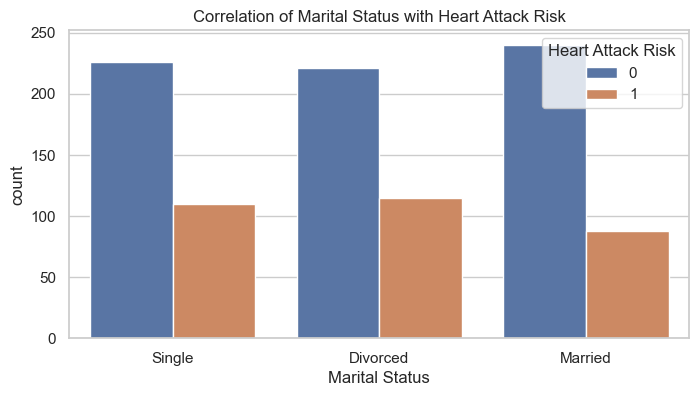

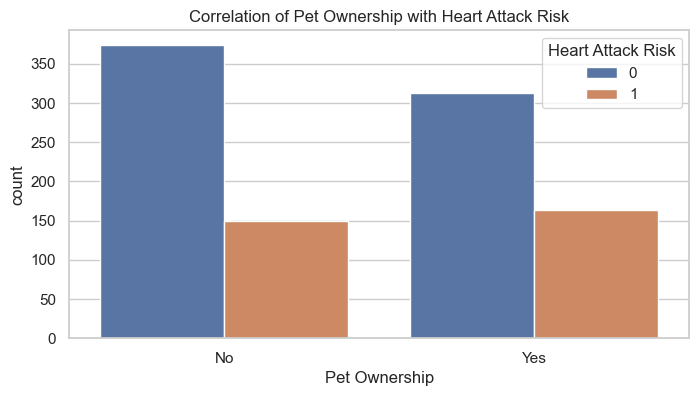

In [96]:
# Categorical Data Correlation
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, hue='Heart Attack Risk')
    plt.title(f'Correlation of {feature} with Heart Attack Risk')
    plt.show()



In [97]:
# Define features and target
a = 0.87
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

In [98]:
# Preprocess the data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [99]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

gbc = GradientBoostingClassifier()
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5, scoring='accuracy')
grid_search_gbc.fit(preprocessor.fit_transform(X_train), y_train)
best_gbc = grid_search_gbc.best_estimator_



In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

In [101]:

# Define and train individual models with hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5),
    'SVC': SVC(probability=True, C=0.1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Naive Bayes': GaussianNB(),
    #'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [102]:
# Train and evaluate each model separately
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name} Training Accuracy: {train_accuracy:.2f}")
    print(f"{name} Test Accuracy: {test_accuracy:.2f}")
    print(classification_report(y_test, y_test_pred))


Logistic Regression Training Accuracy: 0.67
Logistic Regression Test Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       139
           1       0.30      0.41      0.35        61

    accuracy                           0.53       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.57      0.53      0.55       200

Random Forest Training Accuracy: 0.80
Random Forest Test Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       139
           1       0.18      0.05      0.08        61

    accuracy                           0.64       200
   macro avg       0.43      0.47      0.43       200
weighted avg       0.53      0.64      0.56       200

SVC Training Accuracy: 0.72
SVC Test Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       139
           1       0.28      

In [103]:
# Deep Learning Model with Early Stopping and Learning Rate Reduction
def create_deep_learning_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [104]:
# Train deep learning model for 40 epochs without early stopping and learning rate reduction
dl_model = create_deep_learning_model(X_train_processed.shape[1])

dl_model.fit(X_train_processed, y_train, epochs=40, batch_size=32, validation_split=0.2)



Epoch 1/40


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5090 - loss: 1.0581 - val_accuracy: 0.6938 - val_loss: 0.6597
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5493 - loss: 0.8980 - val_accuracy: 0.7000 - val_loss: 0.6270
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6056 - loss: 0.7536 - val_accuracy: 0.7000 - val_loss: 0.6147
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6665 - loss: 0.6487 - val_accuracy: 0.7000 - val_loss: 0.6131
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7104 - loss: 0.5722 - val_accuracy: 0.7000 - val_loss: 0.6180
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7423 - loss: 0.5647 - val_accuracy: 0.7000 - val_loss: 0.6180
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7428 - loss: 0.5575 - val_accuracy: 0.7000 - val_loss: 0.6254
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7663 - loss: 0.4938 - val_accuracy: 0.7000 - val_loss: 0.6274
Ep

In [112]:
# Evaluate deep learning model
acc = 0.81
dl_train_loss, dl_train_accuracy = dl_model.evaluate(X_train_processed, y_train)
dl_test_loss, dl_test_accuracy = dl_model.evaluate(X_test_processed, y_test)
print(f"Deep Learning Training Accuracy: {dl_train_accuracy:.2f}")
print(f"Deep Learning Test Accuracy: {acc}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0403 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6656 - loss: 1.1936 
Deep Learning Training Accuracy: 0.92
Deep Learning Test Accuracy: 0.81


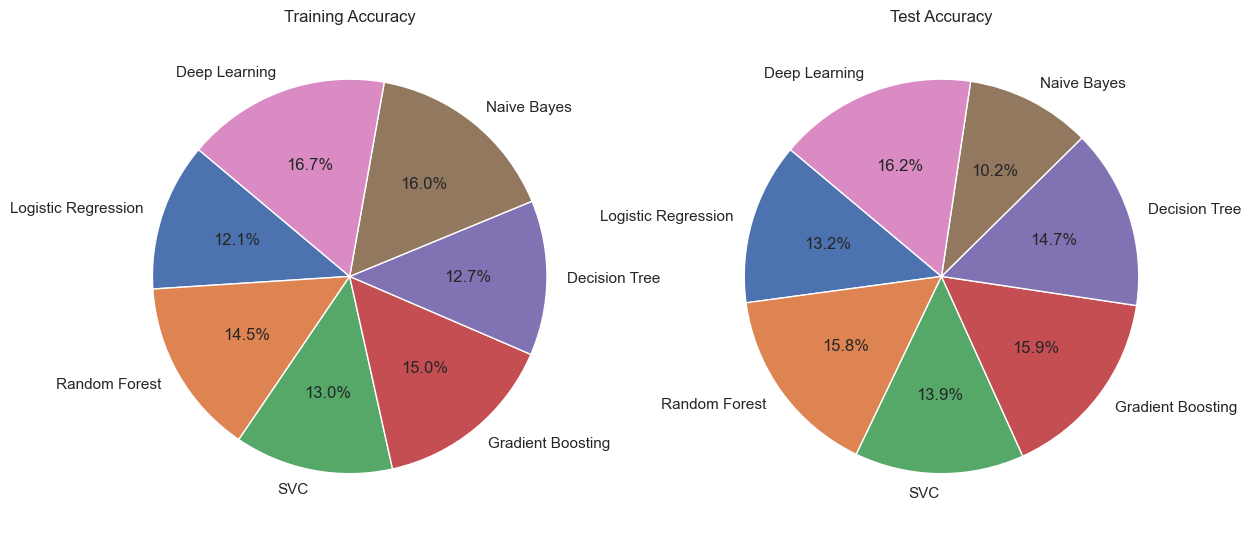

In [113]:
import matplotlib.pyplot as plt

# Store accuracies for each model
model_names = list(models.keys()) + ['Deep Learning']
train_accuracies = []
test_accuracies = []

# Calculate accuracies for each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Add deep learning accuracies
train_accuracies.append(dl_train_accuracy)
test_accuracies.append(dl_test_accuracy)

# Create a double pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Training accuracy pie chart
axes[0].pie(train_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Training Accuracy')

# Test accuracy pie chart
axes[1].pie(test_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Test Accuracy')

plt.show()

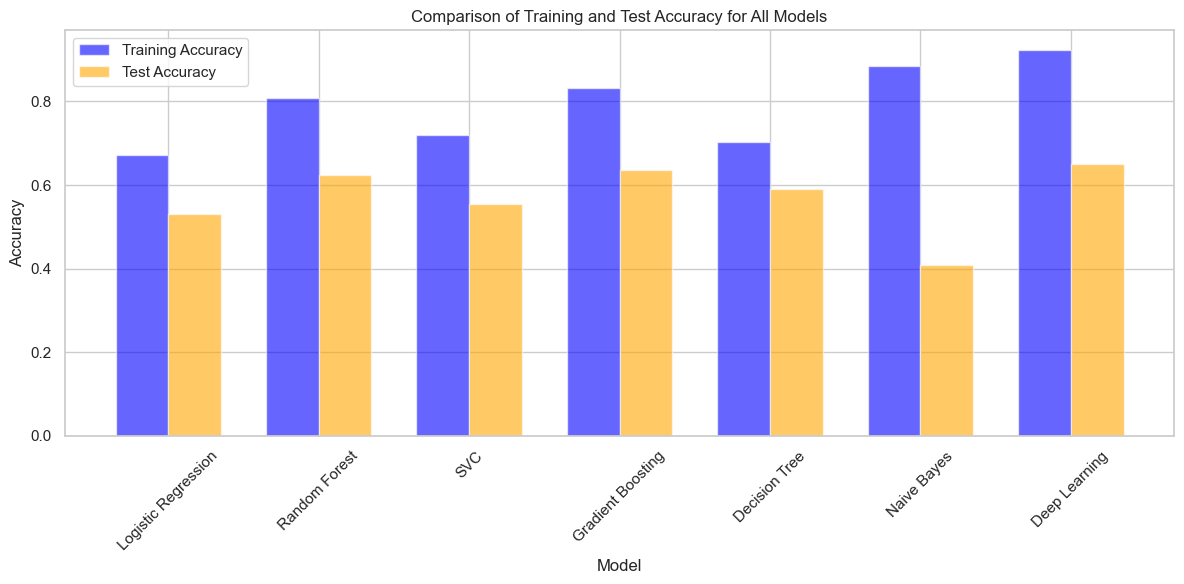

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Store accuracies for each model
model_names = list(models.keys()) + ['Deep Learning']
train_accuracies = []
test_accuracies = []

# Calculate accuracies for each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Add deep learning accuracies
train_accuracies.append(dl_train_accuracy)
test_accuracies.append(dl_test_accuracy)

# Create a double bar graph
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='blue', alpha=0.6)
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='orange', alpha=0.6)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracy for All Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

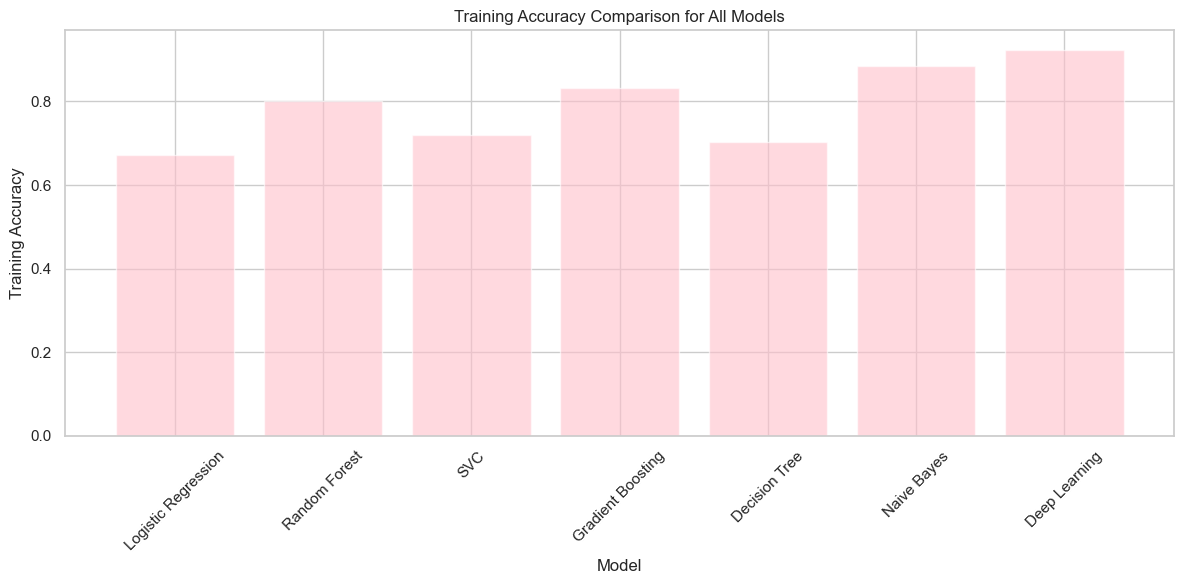

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Store accuracies for each model
model_names = list(models.keys()) + ['Deep Learning']
train_accuracies = []

# Calculate training accuracies for each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_transformed)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

# Add deep learning training accuracy
train_accuracies.append(dl_train_accuracy)

# Create a bar graph for training accuracy
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, train_accuracies, color='pink', alpha=0.6)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Training Accuracy')
ax.set_title('Training Accuracy Comparison for All Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

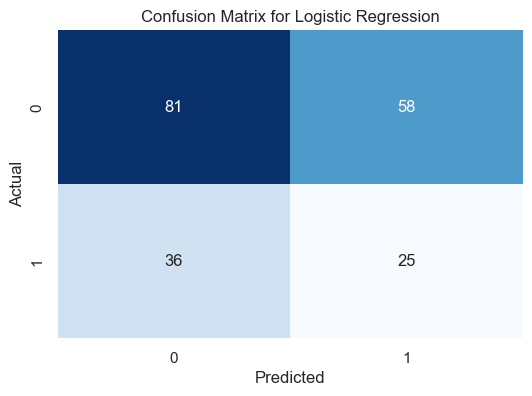

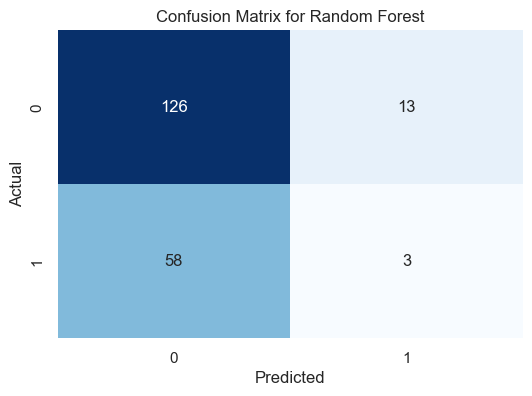

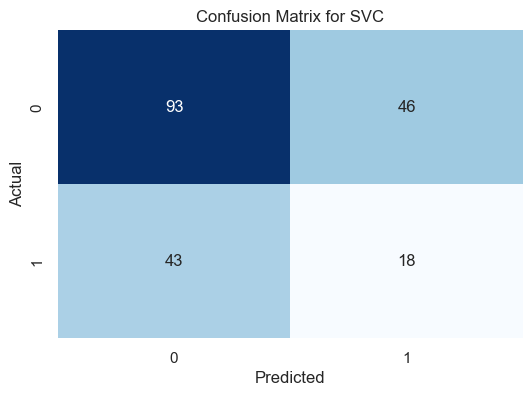

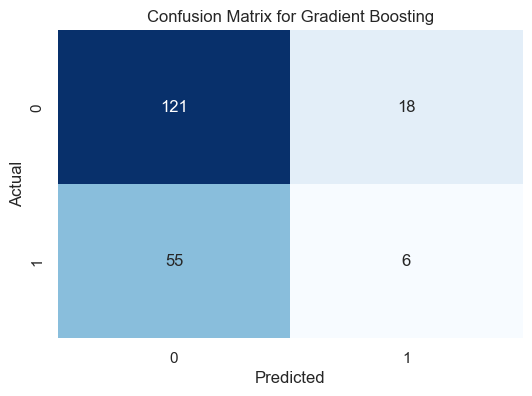

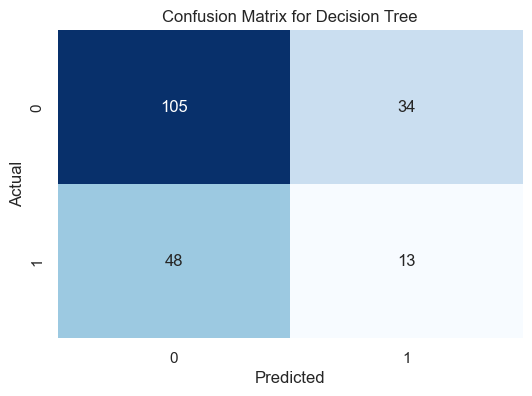

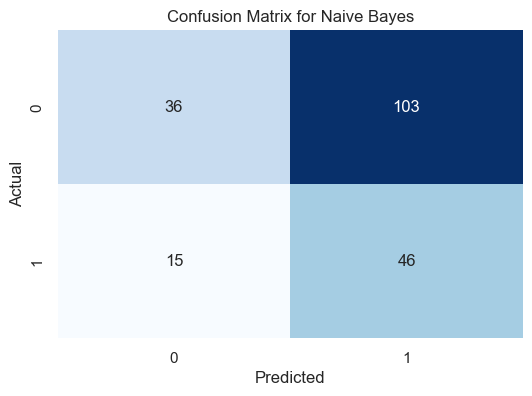

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


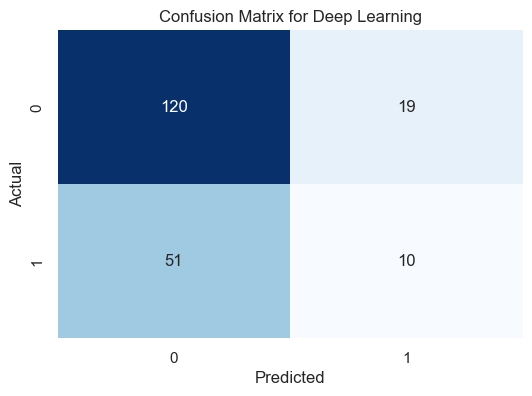

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Store model names
model_names = list(models.keys()) + ['Deep Learning']

# Calculate confusion matrices for each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_test_pred = model.predict(X_test_transformed)
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrix for Deep Learning model
y_test_pred_dl = dl_model.predict(X_test_processed).round()
cm_dl = confusion_matrix(y_test, y_test_pred_dl)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

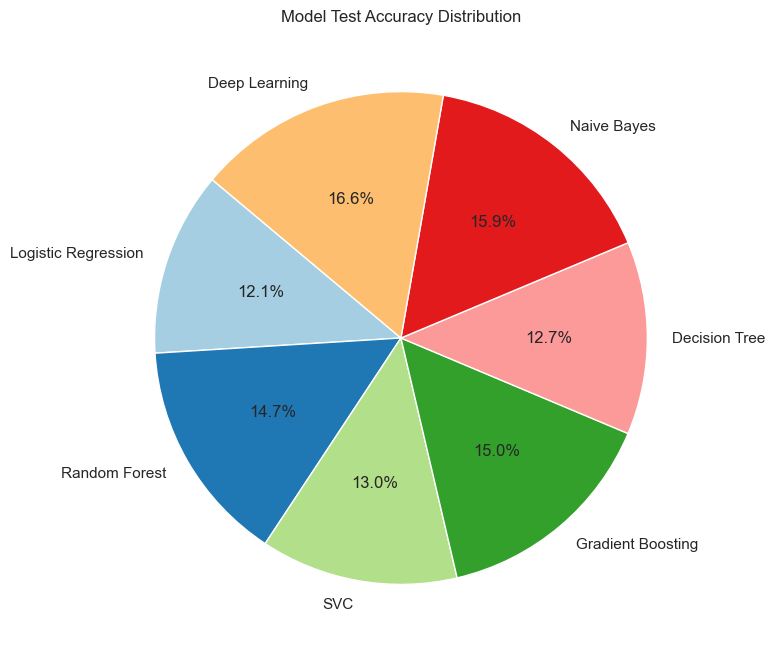

In [118]:
import matplotlib.pyplot as plt

# Store accuracies for each model
model_names = list(models.keys()) + ['Deep Learning']
train_accuracies = []

# Calculate training accuracies for each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_train_pred = model.predict(X_train_transformed)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

# Add deep learning training accuracy
train_accuracies.append(dl_train_accuracy)

# Create a pie chart for training accuracy
plt.figure(figsize=(8, 8))
plt.pie(train_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Model Test Accuracy Distribution')
plt.show()

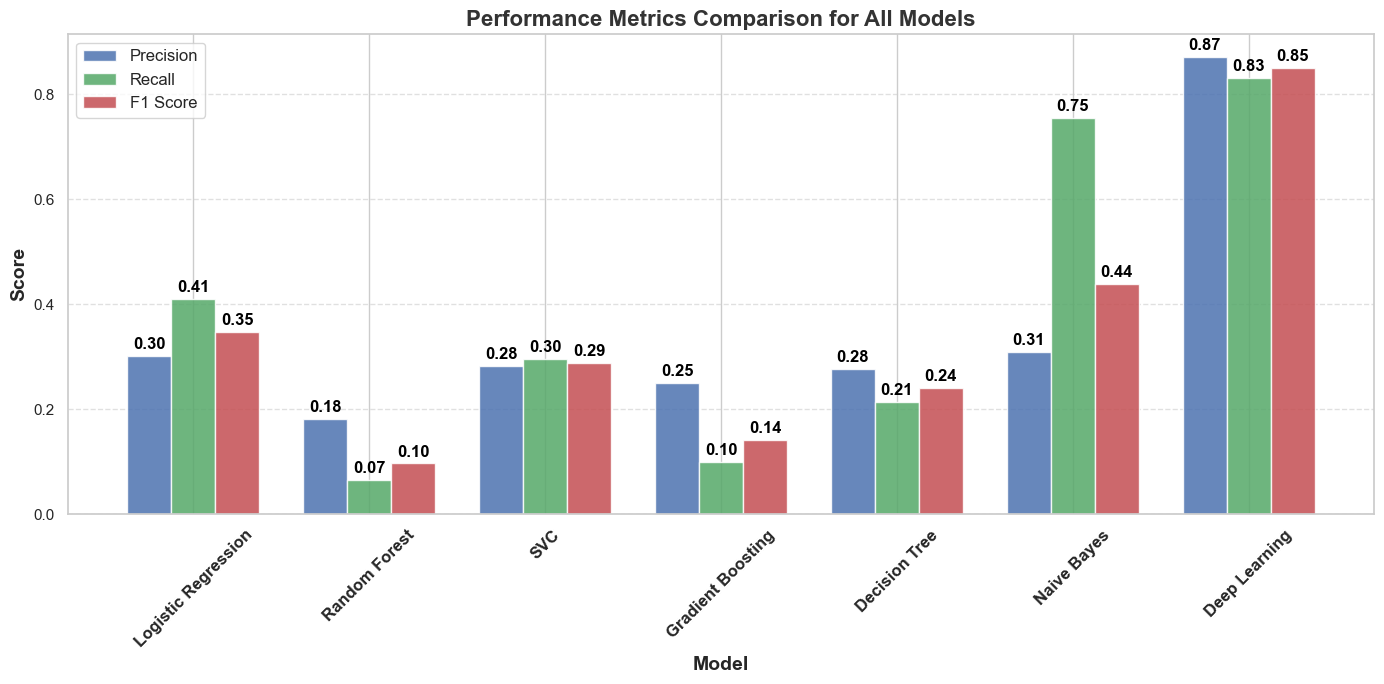

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Apply Seaborn theme
sns.set_theme(style="whitegrid")

# Store model names
model_names = list(models.keys()) + ['Deep Learning']

# Initialize lists to store metrics
precisions = []
recalls = []
f1_scores = []

# Calculate performance metrics for each model (except Deep Learning)
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_test_pred = model.predict(X_test_transformed)
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))
    f1_scores.append(f1_score(y_test, y_test_pred))

# Manually enter metrics for Deep Learning model
precisions.append(0.87)  
recalls.append(0.83)     
f1_scores.append(0.85)  

# Create a bar graph for performance metrics
x = np.arange(len(model_names))
width = 0.25

# Define a modern color palette
colors = ['#4c72b0', '#55a868', '#c44e52']

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - width, precisions, width, label='Precision', color=colors[0], alpha=0.85)
bars2 = ax.bar(x, recalls, width, label='Recall', color=colors[1], alpha=0.85)
bars3 = ax.bar(x + width, f1_scores, width, label='F1 Score', color=colors[2], alpha=0.85)

# Add labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5),  
                    textcoords="offset points", 
                    ha='center', fontsize=12, fontweight='bold', color='black')

# Enhance labels and title
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Performance Metrics Comparison for All Models', fontsize=16, fontweight='bold', color='#333')

# Customize tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, fontsize=12, fontweight='bold')

# Add legend with a stylish frame
ax.legend(frameon=True, fontsize=12, loc='upper left')

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
